Calculate the Fresnel Diffraction pattern from grating in 1D. 

Step 1: Given $\lambda, z$ and the largest width $l$ of the aperture, calculate the Fresnel number $N_F$.

In [1]:
import numpy as np
lam = 800e-9 #wavelength [m]
z = 1 # propagation distance [m]
l = 1e-3 # feature size

Nf = np.power((l/2),2)/(lam*z)
print('Nf equals {0}'.format(Nf))

Nf equals 0.3125


Step 2: Choose an acceptable level of aliasing at the edge of the diffraction pattern.  
Step 3: Choose M, Q, and N = QM from Figure 5.5 of Goodman.

In [2]:
aliasLvl = 1e-4
M = 100 #how many points to sample the feature with
Q = 100 #scale factor between feature and surrounding

N = Q*M #total number of sampling points. 
deltax = l/M 
print(deltax)

1e-05


Step 4: Create the grating array of size N

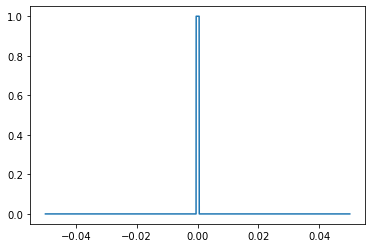

In [3]:
import matplotlib.pyplot as plt
from scipy import signal

# create x-vector

xvec = np.arange(-deltax*N/2,deltax*N/2,deltax)

aperture = np.zeros((N))
center = int(N/2)
edge = int(M/2)
aperture[center-edge:center+edge+1] = 1

plt.plot(xvec,aperture)


Step 5: Create the quadratic-phase exponential transfer function array of length NxN centered at N/2, N/2.
NOTE: This step takes a long time. 

In [4]:
delfx = 1/(-deltax*N/2)
fxvec = np.arange(-delfx*N/2,delfx*N/2,delfx)
H = np.exp(1j*2.0*np.pi/lam*z)*np.exp(-1j* np.pi*lam*z*(np.power(fxvec,2)))
H = np.array(H)

(20000.0, -20000.0)

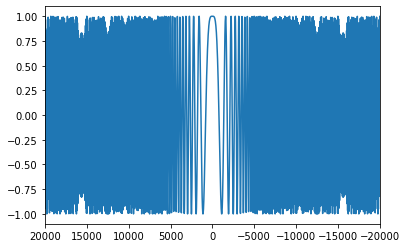

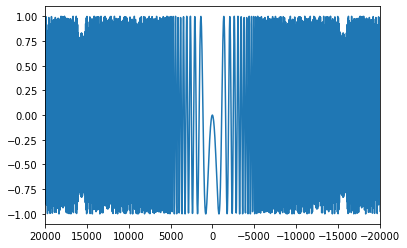

In [5]:
plt.plot(fxvec,np.real(H))
plt.xlim(-delfx*1000,delfx*1000)

plt.figure()
plt.plot(fxvec,np.imag(H))
plt.xlim(-delfx*1000,delfx*1000)


Step 6: Perform DFT on the aperture array and center

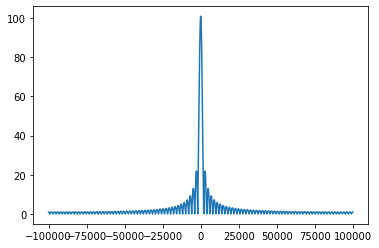

In [6]:
apertureFFT = np.fft.fft(aperture)
apertureFFT2 = np.fft.fftshift(apertureFFT)
plt.plot(fxvec,abs(apertureFFT2))


Step 7: Multiply the spectral arrays and perform inverse FFT

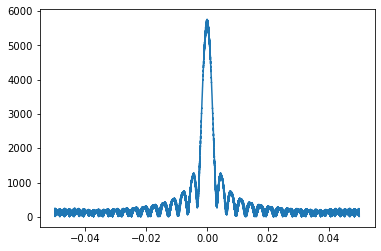

In [7]:
yfft = apertureFFT2*H
y = np.fft.fft(yfft)

plt.plot(xvec,np.abs(y))
